# CNN

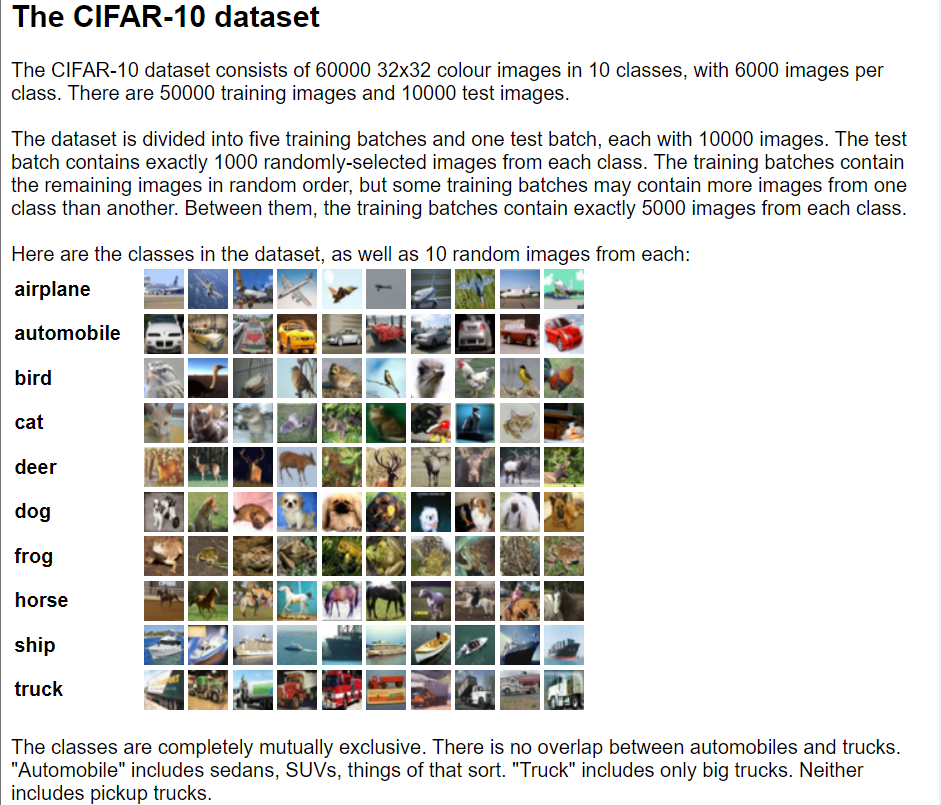

In [18]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [65]:
(X_train,y_train),(X_test,y_test)= datasets.cifar10.load_data()

In [66]:
X_train.shape

(50000, 32, 32, 3)

In [67]:
y_train.shape

(50000, 1)

In [64]:
X_test.shape

(32, 32, 3)

In [42]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [43]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

 y_train is a 2D array, for our classification having 1D array is good enough. so we will convert this to now 1D array

In [44]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [58]:
y_test = y_test.reshape(-1,)

 We kept first index as -1 as we dont want to change 10000,and left other index blank because we need to flatten it.

In [45]:
classes=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [46]:
classes[9]

'truck'

In [90]:
def plot_sample(X,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(X_train[index])
    plt.xlabel(classes[y[index]])

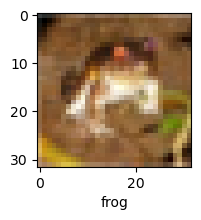

In [48]:
plot_sample(X_train,y_train,0)

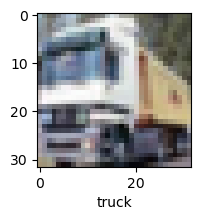

In [49]:
plot_sample(X_train,y_train,1)

In [50]:
X_train=X_train[0]/255
X_test=X_test[0]/255


In [60]:
X_train.shape

(32, 32, 3)

In [61]:
y_train.shape

(50000,)

# Build simple artificial neural network for image classification

In [68]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 40s 25ms/step - loss: nan - accuracy: 0.1001
Epoch 2/5
1563/1563 [==============================] - 41s 27ms/step - loss: nan - accuracy: 0.1000
Epoch 3/5
1563/1563 [==============================] - 41s 26ms/step - loss: nan - accuracy: 0.1000
Epoch 4/5
1563/1563 [==============================] - 42s 27ms/step - loss: nan - accuracy: 0.1000
Epoch 5/5
1563/1563 [==============================] - 37s 24ms/step - loss: nan - accuracy: 0.1000


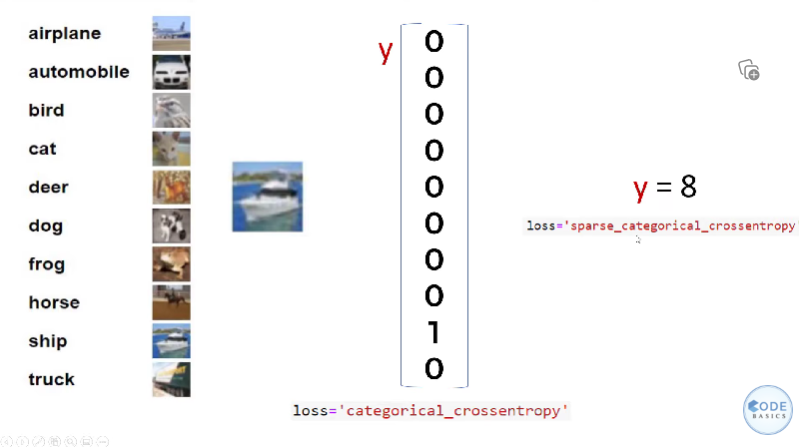

For one hot encoded vector matrix,we use simply categorical otherwise we use sparse.

In [69]:
ann.evaluate(X_tets,y_test)

313/313 [==============================] - 2s 5ms/step - loss: nan - accuracy: 0.1000


[nan, 0.10000000149011612]

In [70]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 2s 5ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.10      1.00      0.18      1000
           1       0.00      0.00      0.00      1000
           2       0.00      0.00      0.00      1000
           3       0.00      0.00      0.00      1000
           4       0.00      0.00      0.00      1000
           5       0.00      0.00      0.00      1000
           6       0.00      0.00      0.00      1000
           7       0.00      0.00      0.00      1000
           8       0.00      0.00      0.00      1000
           9       0.00      0.00      0.00      1000

    accuracy                           0.10     10000
   macro avg       0.01      0.10      0.02     10000
weighted avg       0.01      0.10      0.02     10000



C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Now let us build a convolutional neural network to train our images

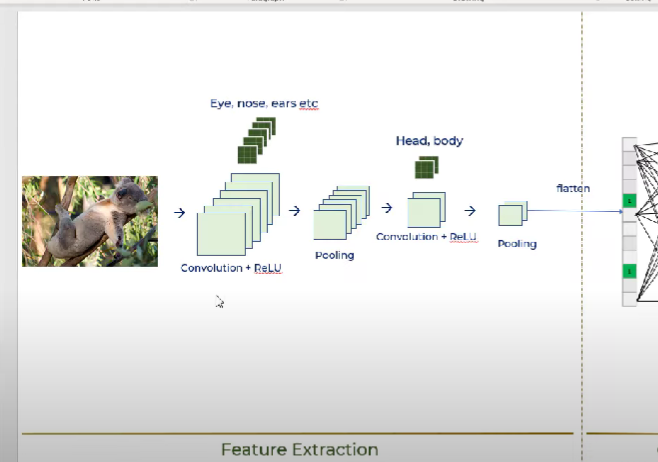

In [77]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

 using filter=32,etc.It will by own identify 32 features.

Now let us see what softmax do

1: 0.45
2: 0.67

In [78]:
0.45/(0.45+0.67)

0.40178571428571425

In [79]:
0.67/(0.45+0.67)

0.5982142857142857

In [80]:
0.5982142857142857 + 0.40178571428571425

1.0

In [81]:
0.45 + 0.67

1.12

In [82]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [83]:
cnn.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 13s 8ms/step - loss: 2.1661 - accuracy: 0.3888
Epoch 2/5
1563/1563 [==============================] - 13s 8ms/step - loss: 1.3470 - accuracy: 0.5233
Epoch 3/5
1563/1563 [==============================] - 11s 7ms/step - loss: 1.1987 - accuracy: 0.5812
Epoch 4/5
1563/1563 [==============================] - 10s 7ms/step - loss: 1.0826 - accuracy: 0.6237
Epoch 5/5
1563/1563 [==============================] - 10s 7ms/step - loss: 1.0050 - accuracy: 0.6513


# With CNN, at the end 5 epochs, accuracy was at around 66% which is a significant improvement over ANN. CNN's are best for image classification and gives superb accuracy. Also computation is much less compared to simple ANN as maxpooling reduces the image dimensions while still preserving the features

In [84]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.1231 - accuracy: 0.6213


[1.1230915784835815, 0.6212999820709229]

In [85]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 1s 2ms/step


array([[2.33224151e-03, 3.24997702e-03, 2.01929752e-02, 3.72206658e-01,
        1.23388460e-02, 1.10438898e-01, 3.03035051e-01, 9.10566305e-04,
        1.39648139e-01, 3.56466621e-02],
       [8.14156756e-02, 6.93213642e-01, 7.74973887e-04, 2.35732383e-04,
        9.08560251e-05, 2.53234812e-05, 2.65303297e-05, 1.22867481e-04,
        1.35872990e-01, 8.82213637e-02],
       [2.49925300e-01, 1.58140481e-01, 1.11927904e-01, 2.51085740e-02,
        1.47343883e-02, 8.15980509e-03, 2.83680167e-02, 1.45518016e-02,
        3.27055037e-01, 6.20287061e-02],
       [5.34909904e-01, 7.50850290e-02, 8.82898122e-02, 6.86601503e-03,
        2.24321382e-03, 6.97011536e-04, 3.39616952e-03, 1.33314321e-03,
        2.81459332e-01, 5.72032621e-03],
       [4.06336949e-05, 5.79940679e-04, 8.94335285e-03, 6.14352711e-02,
        1.34685123e-02, 9.50151123e-03, 9.03850794e-01, 5.39263710e-05,
        1.12726854e-03, 9.98746487e-04]], dtype=float32)

In [86]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 1, 8, 0, 6]

In [87]:
y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

TypeError: only integer scalar arrays can be converted to a scalar index

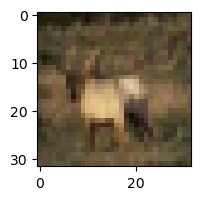

In [93]:
plot_sample(X_test, y_test,3)

In [89]:
classes[y_classes[3]]

'airplane'

In [94]:
print("classification Report :\n ",classification_report(y_test,y_classes))

classification Report :
                precision    recall  f1-score   support

           0       0.63      0.71      0.67      1000
           1       0.70      0.80      0.75      1000
           2       0.47      0.57      0.51      1000
           3       0.51      0.34      0.41      1000
           4       0.68      0.37      0.48      1000
           5       0.54      0.58      0.56      1000
           6       0.59      0.81      0.68      1000
           7       0.68      0.68      0.68      1000
           8       0.77      0.64      0.70      1000
           9       0.68      0.71      0.69      1000

    accuracy                           0.62     10000
   macro avg       0.63      0.62      0.61     10000
weighted avg       0.63      0.62      0.61     10000



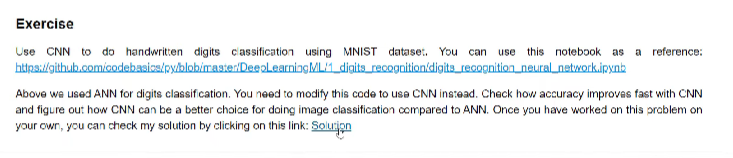

# Convolutional Padding and Stride

 Let us see by how much we reduce input size 

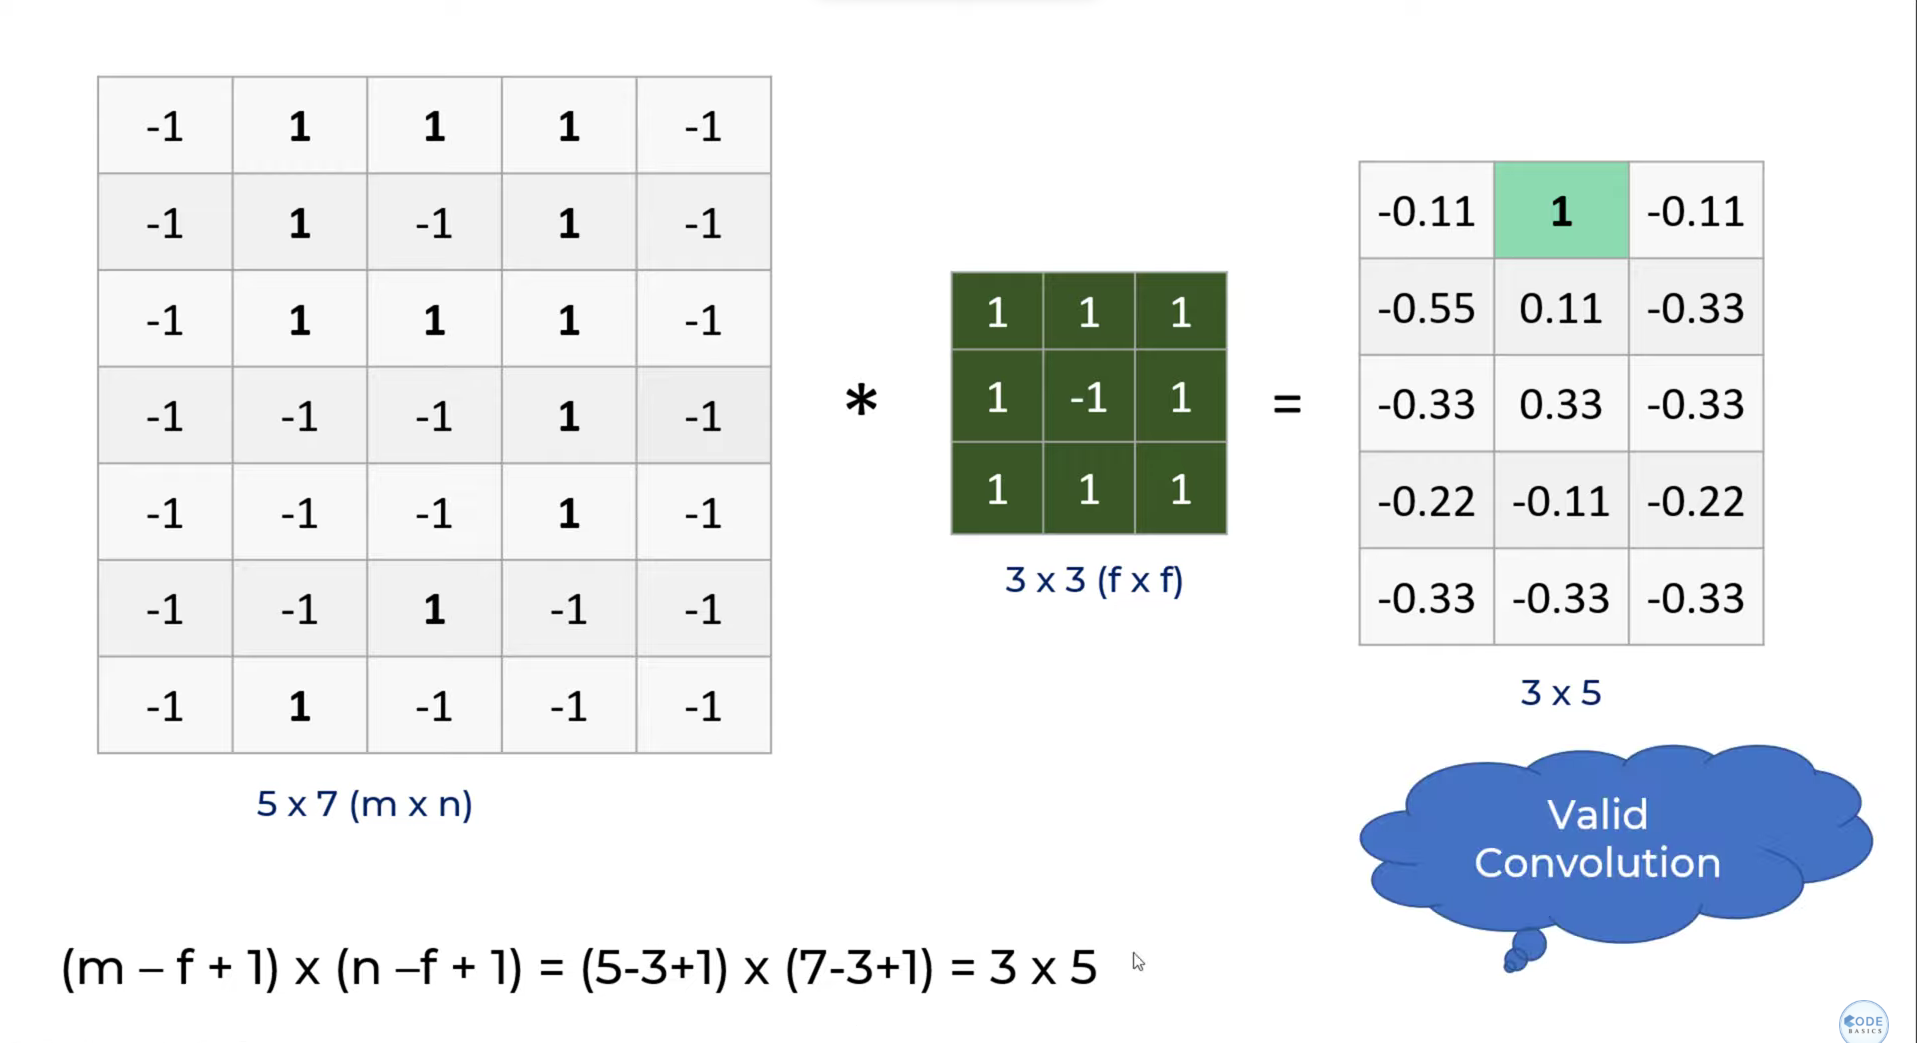

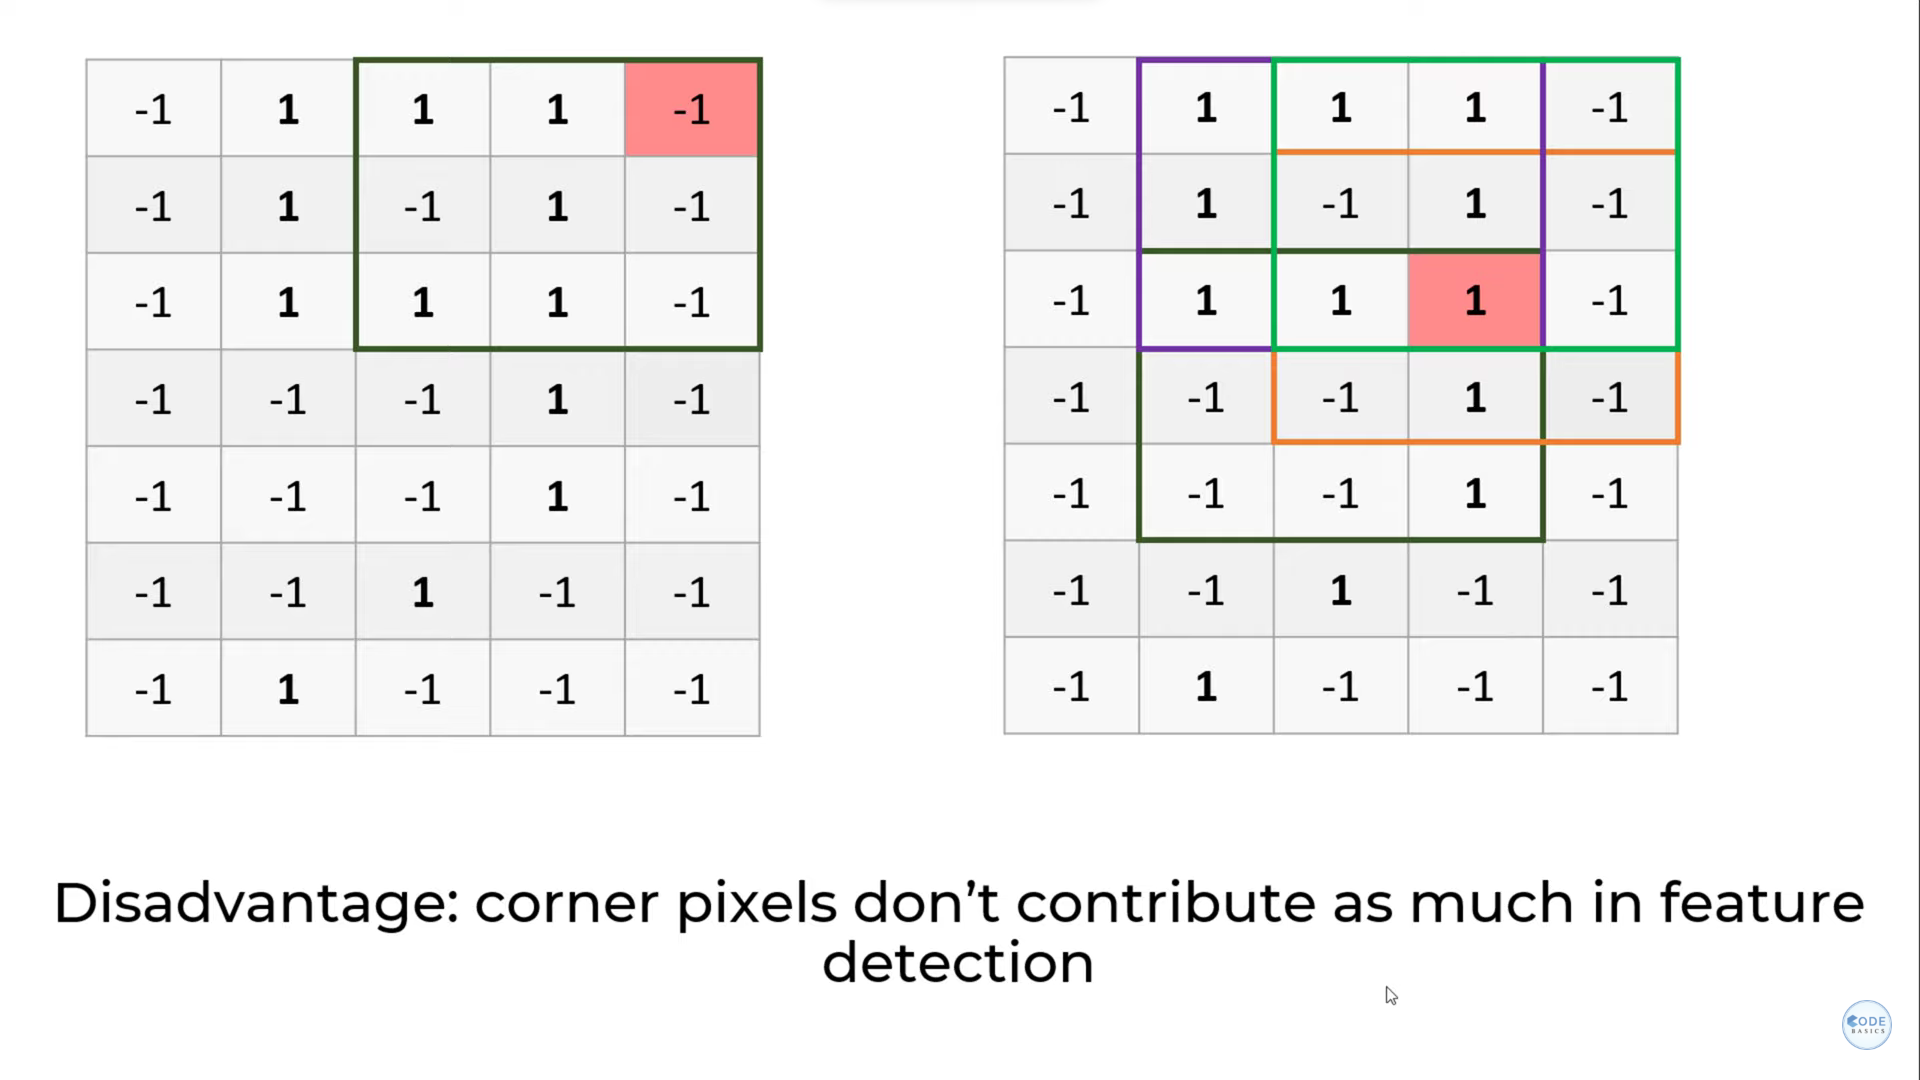

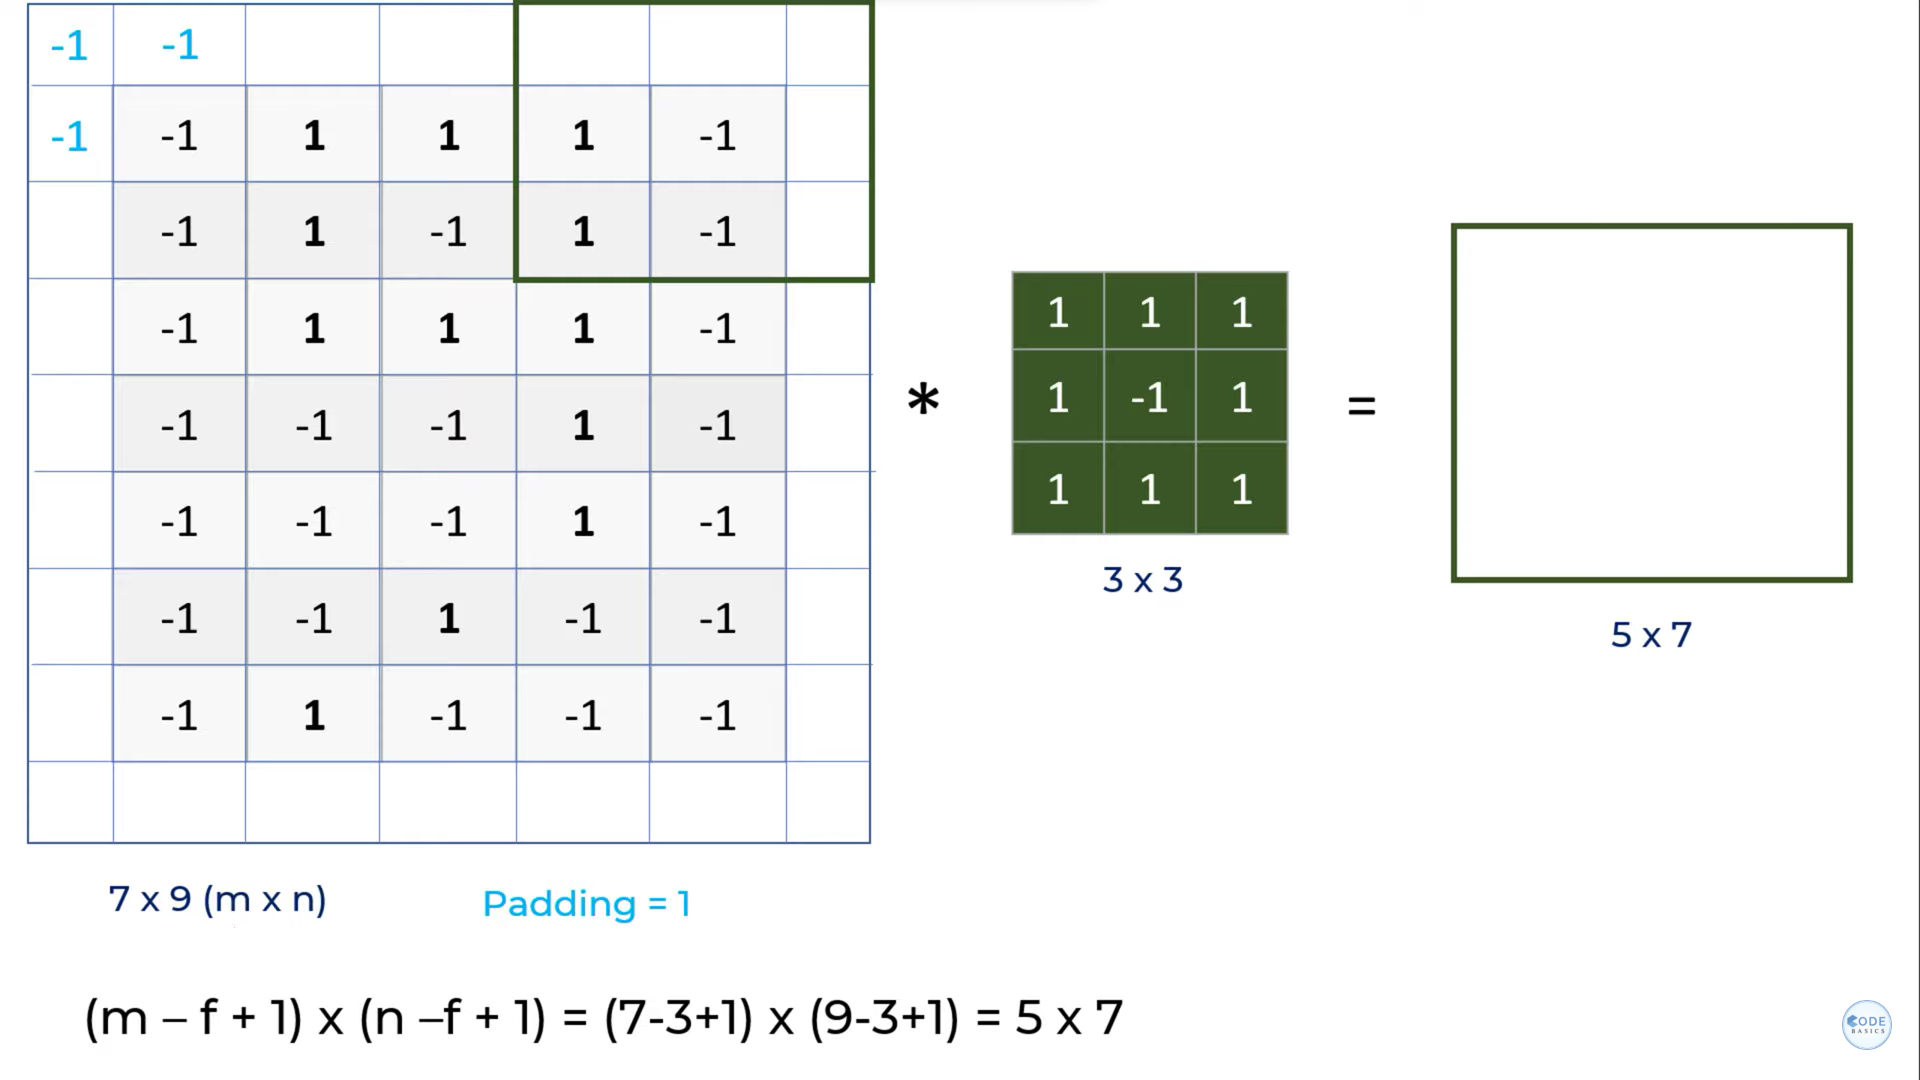

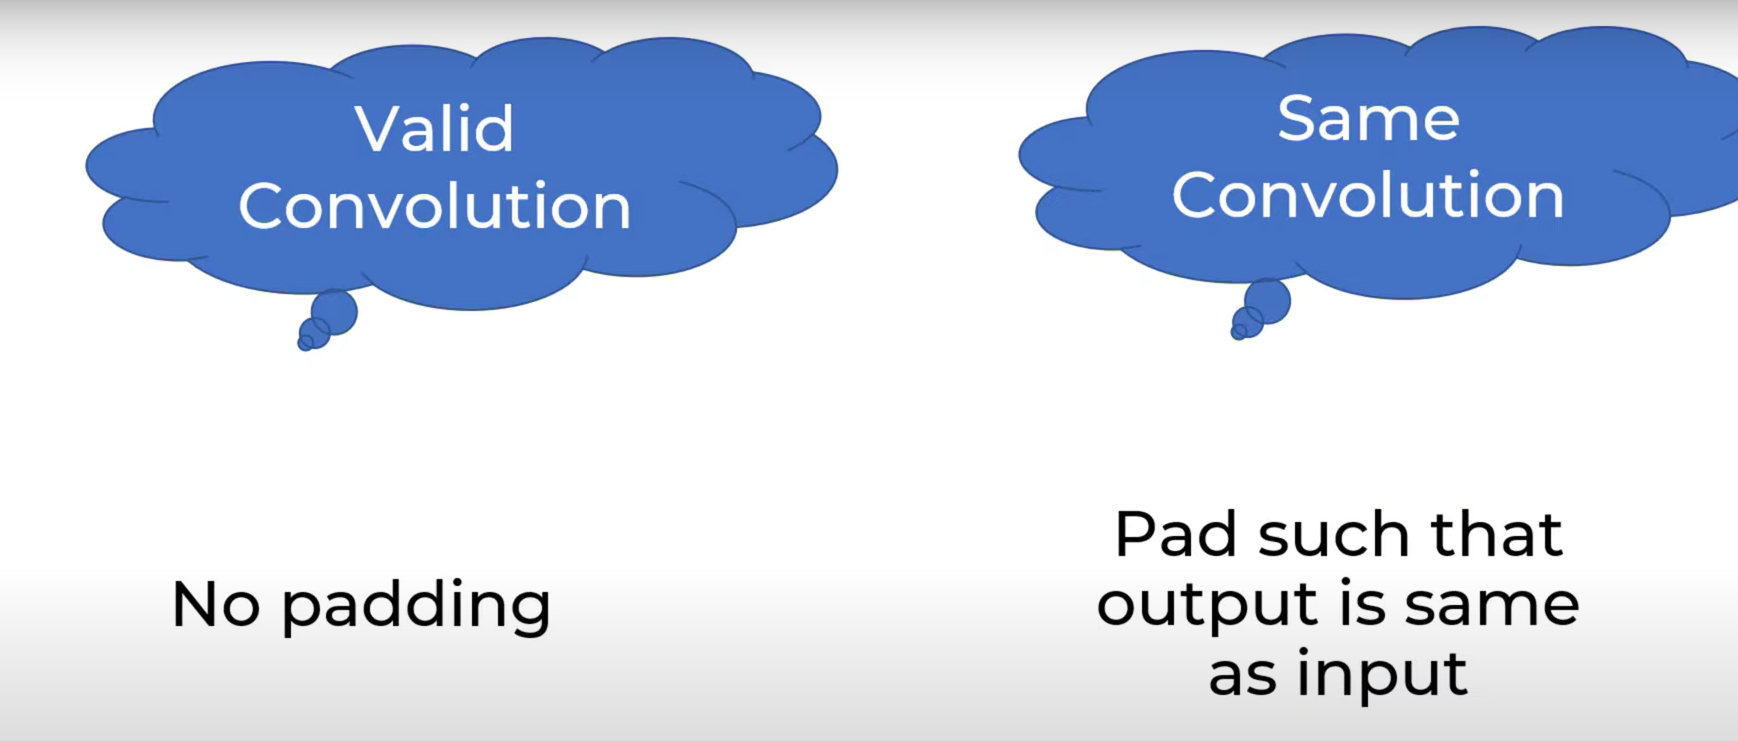

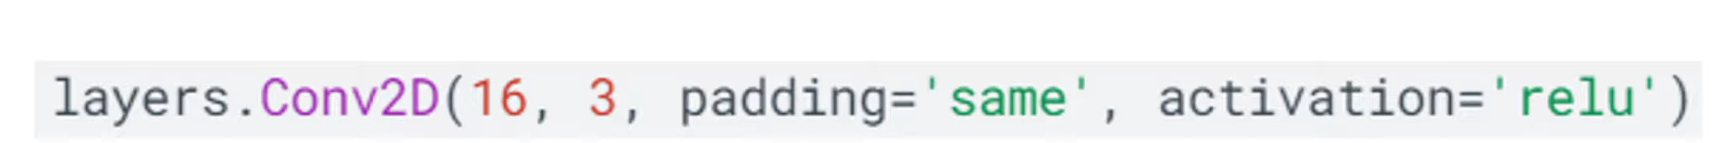

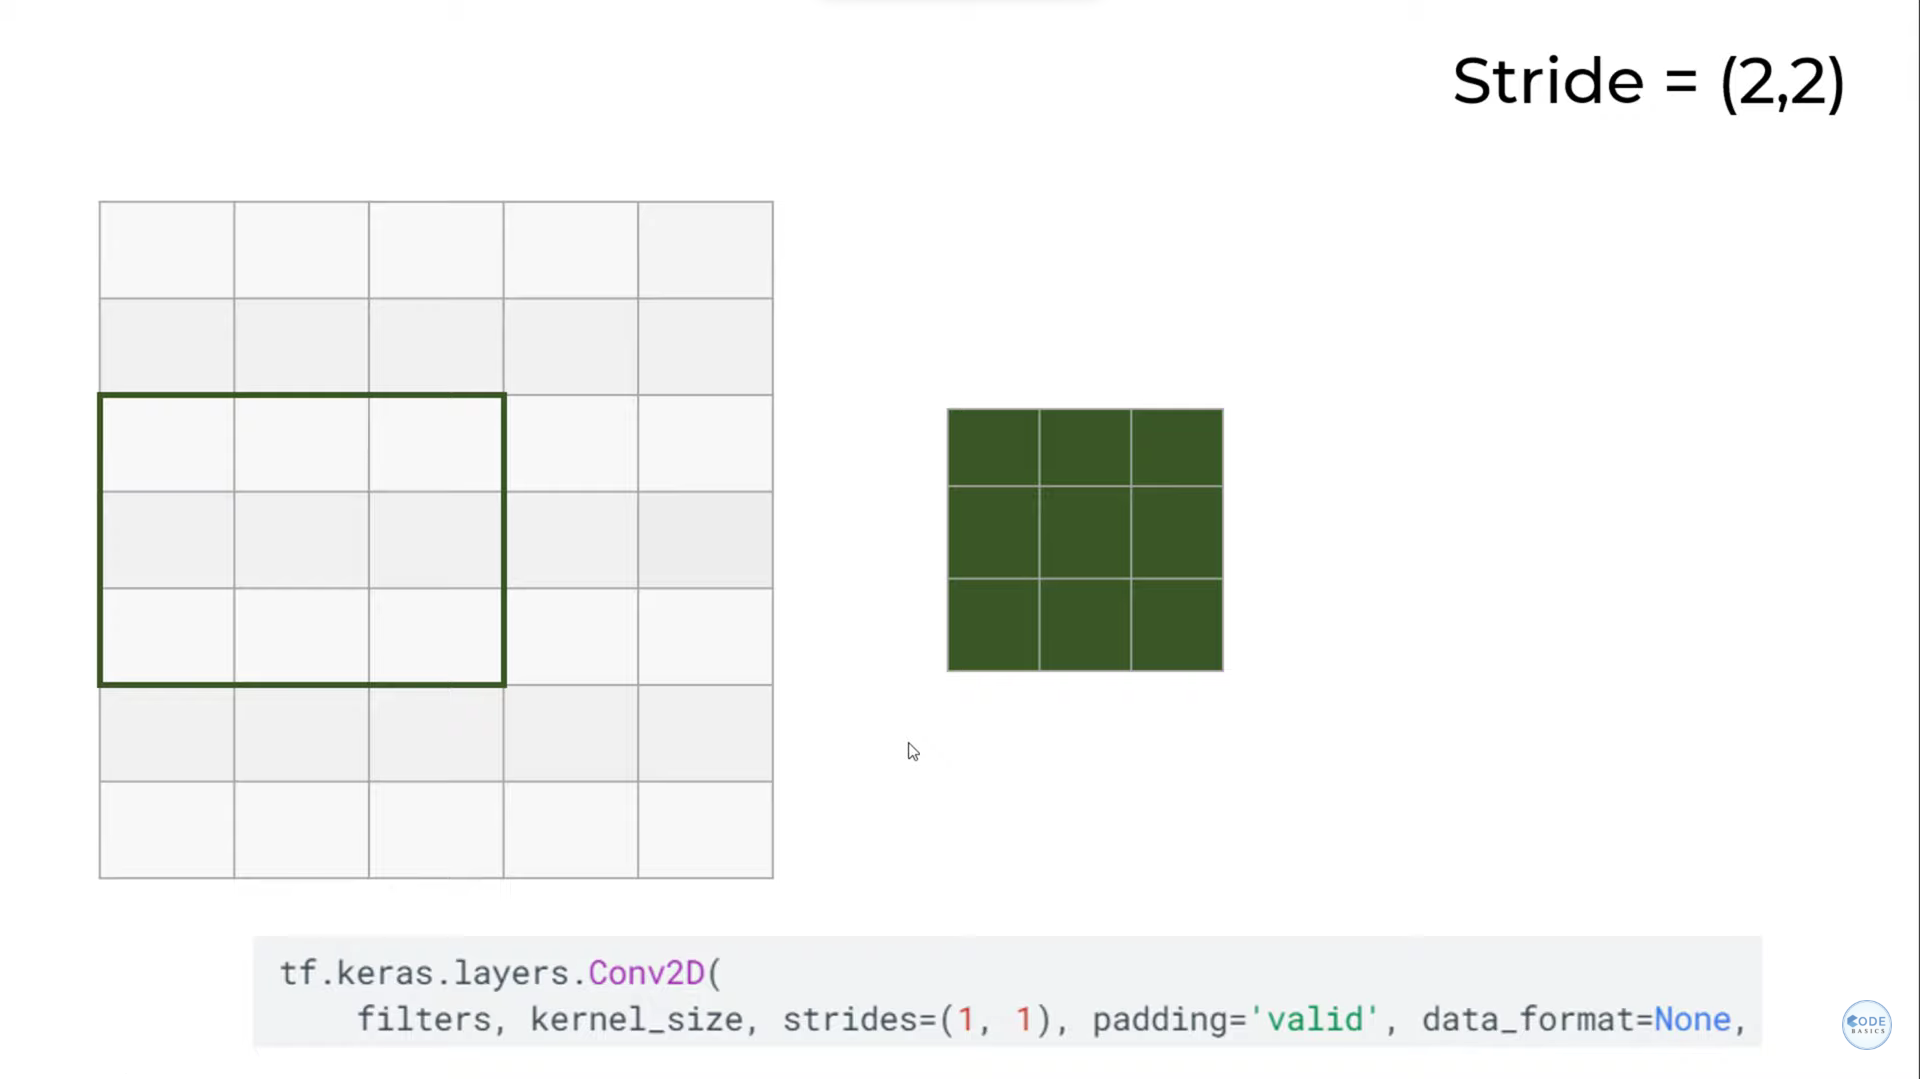

# Data Augmentation To Address Overfitting In Flower Classification CNN

 In this notebook we will build a CNN to classify flower images. We will also see how our model overfits and how overfitting can be addressed using data augmentation. Data augmentation is a process of generating new training samples from current training dataset using transformations such as zoom, rotations, change in contrast etc

 In below image, 4 new training samples are generated from original sample using different transformations

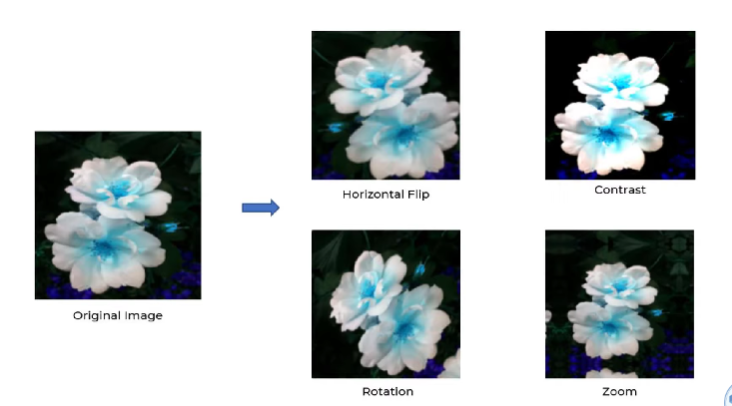

 Credits: I used tensorflow offical tutorial: https://www.tensorflow.org/tutorials/images/classification as a reference and made bunch of changes to make it simpler

In [2]:
pip install opencv-python

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

 We will download flowers dataset from google website and store it locally. In below call it downloads the zip file (.tgz) in cache_dir which is . meaning the current folder

# Load flowers dataset

In [4]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)
# cache_dir indicates where to download data. I specified . which means current directory
# untar true will unzip it

In [100]:
data_dir

'.\\datasets\\flower_photos'

In [5]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photos')

In [6]:
image_count = len(list(data_dir.glob('*/*.jpg')))
image_count

3670

In [7]:
roses = list(data_dir.glob('roses/*.jpg'))
roses[:5]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

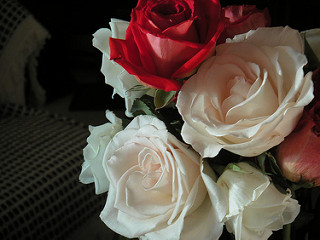

In [8]:
PIL.Image.open(str(roses[1]))

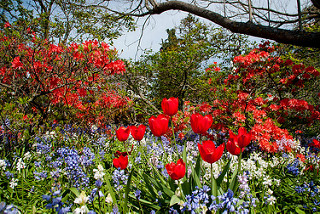

In [9]:
tulips = list(data_dir.glob('tulips/*.jpg'))
PIL.Image.open(str(tulips[4]))

In [10]:
flower_images_dict = {
    'roses':list(data_dir.glob('roses/*')),
    'daisy':list(data_dir.glob('daisy/*')),
    'tulips':list(data_dir.glob('tulips/*')),
    'dandelion':list(data_dir.glob('dandelion/*')),
    'sunflowers':list(data_dir.glob('sunflowers/*')),
}

In [11]:
flower_images_dict['roses']

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/11102341464_508d558dfc_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/11233672494_d8bf0a3dbf_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/11694025703_9a906fedc1_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/118974357_0faa23cce9_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/11944957684_2cc806276e.jpg'),
 WindowsPath('datasets/flower_photos/roses/12045735155_42547ce4e9_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/12165480946_c4a3fe182d_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/12202373204_34fb07205b.jpg'),
 WindowsPath('datasets/flower_photos/

In [12]:
flowers_labels_dict={
    'roses': 0,
    'daisy':1,
    'dandelion':2,
    'sunflowers':3,
    'tulips':4
}

# Read flowers images from disk into numpy array using opencv

In [13]:
flower_images_dict['roses'][0]

WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg')

In [14]:
str(flower_images_dict['roses'][0])

'datasets\\flower_photos\\roses\\10090824183_d02c613f10_m.jpg'

In [15]:
img = cv2.imread(str(flower_images_dict['roses'][0]))
img

array([[[ 0, 15,  6],
        [ 0, 15,  6],
        [ 0, 17,  8],
        ...,
        [24, 51, 31],
        [25, 52, 32],
        [26, 53, 33]],

       [[ 7, 22, 14],
        [ 7, 22, 14],
        [ 6, 21, 13],
        ...,
        [20, 46, 30],
        [23, 49, 33],
        [25, 51, 35]],

       [[12, 23, 15],
        [12, 23, 15],
        [11, 22, 14],
        ...,
        [20, 42, 30],
        [23, 45, 33],
        [26, 48, 36]],

       ...,

       [[19, 30, 27],
        [14, 24, 18],
        [12, 20, 13],
        ...,
        [ 4, 13,  3],
        [ 0,  8,  1],
        [ 0,  5,  0]],

       [[19, 30, 28],
        [18, 27, 24],
        [15, 23, 16],
        ...,
        [ 3, 12,  2],
        [ 1,  9,  2],
        [ 0,  7,  2]],

       [[ 9, 19, 19],
        [17, 25, 24],
        [22, 29, 24],
        ...,
        [ 1, 12,  2],
        [ 2, 10,  3],
        [ 3, 11,  4]]], dtype=uint8)

In [52]:
img.shape

(240, 159, 3)

In [53]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [54]:

for flower_name,images in flower_images_dict.items():
    print(flower_name)
    print(len(images))

roses
641
daisy
633
tulips
799
dandelion
898
sunflowers
699


In [55]:
X,y=[],[]
for flower_name,images in flower_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(100,100))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [56]:
X=np.array(X)
y=np.array(y)

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [58]:
len(X_train)

2752

In [59]:
len(X_test)

918

In [60]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [25]:
num_classes = 5
model =Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=10)              

Epoch 1/10
86/86 [==============================] - 4s 44ms/step - loss: 1.2352 - accuracy: 0.4717
Epoch 2/10
86/86 [==============================] - 4s 43ms/step - loss: 0.9734 - accuracy: 0.6145
Epoch 3/10
86/86 [==============================] - 6s 67ms/step - loss: 0.8027 - accuracy: 0.6879
Epoch 4/10
86/86 [==============================] - 5s 55ms/step - loss: 0.6692 - accuracy: 0.7544
Epoch 5/10
86/86 [==============================] - 4s 49ms/step - loss: 0.5636 - accuracy: 0.7798
Epoch 6/10
86/86 [==============================] - 5s 53ms/step - loss: 0.4266 - accuracy: 0.8412
Epoch 7/10
86/86 [==============================] - 4s 52ms/step - loss: 0.3149 - accuracy: 0.8895
Epoch 8/10
86/86 [==============================] - 3s 39ms/step - loss: 0.2216 - accuracy: 0.9262
Epoch 9/10
86/86 [==============================] - 3s 40ms/step - loss: 0.1490 - accuracy: 0.9553
Epoch 10/10
86/86 [==============================] - 4s 47ms/step - loss: 0.1082 - accuracy: 0.9702


In [26]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 1s 20ms/step - loss: 1.4873 - accuracy: 0.6612


[1.4872671365737915, 0.6612200140953064]

# Here we see that while train accuracy is very high (97%), the test accuracy is significantly low (66.99%) indicating overfitting. Let's make some predictions before we use data augmentation to address overfitting

In [27]:
predictions = model.predict(X_test_scaled)
predictions

29/29 [==============================] - 1s 17ms/step


array([[  1.8954185 ,  15.273454  ,  -8.617056  ,  -6.581228  ,
         -3.6266332 ],
       [  8.898077  ,  -3.2332752 , -18.311535  ,  -4.5124097 ,
          2.0544684 ],
       [  2.678749  ,  -0.13234499,  -7.0007706 ,  -3.2366095 ,
          3.8484464 ],
       ...,
       [ -0.9916662 ,   2.2057228 ,   1.4442658 ,  -3.057205  ,
         -2.1075785 ],
       [  5.5121565 ,   1.2861692 ,  -5.5721617 ,  -6.035056  ,
         -0.19907813],
       [ -1.6151738 ,  -2.2256217 ,   9.172866  ,  -8.4240055 ,
         -0.66263074]], dtype=float32)

In [31]:
score = tf.nn.softmax(predictions[0])
score

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([1.5487892e-06, 9.9999845e-01, 4.2119423e-11, 3.2257594e-10,
       6.1914971e-09], dtype=float32)>

In [34]:
np.argmax(np.array([0,78,123,-4]))

2

In [35]:
np.argmax(score)

1

In [30]:
y_test[0]

1

# Improve Test Accuracy Using Data Augmentation

In [68]:
img_height = 100
img_width = 100

data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

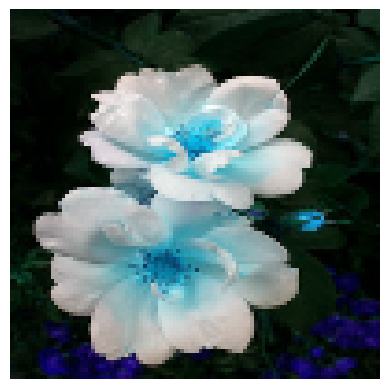

In [69]:
plt.axis('off')
plt.imshow(X[0])

# Newly generated training sample using data augmentation

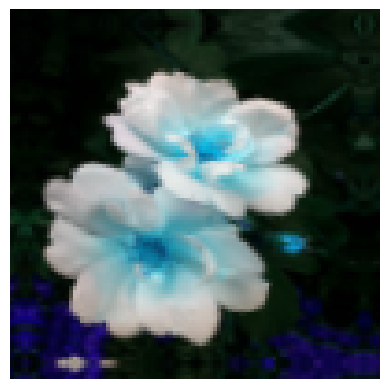

In [70]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

# Train the model using data augmentation and a drop out layer

In [75]:
num_classes = 5

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=10)  

Epoch 1/10
86/86 [==============================] - 9s 70ms/step - loss: 1.2743 - accuracy: 0.4517
Epoch 2/10
86/86 [==============================] - 7s 78ms/step - loss: 1.0399 - accuracy: 0.5967
Epoch 3/10
86/86 [==============================] - 7s 76ms/step - loss: 0.9192 - accuracy: 0.6468
Epoch 4/10
86/86 [==============================] - 6s 71ms/step - loss: 0.8646 - accuracy: 0.6686
Epoch 5/10
86/86 [==============================] - 7s 76ms/step - loss: 0.7957 - accuracy: 0.6893
Epoch 6/10
86/86 [==============================] - 6s 71ms/step - loss: 0.7401 - accuracy: 0.7137
Epoch 7/10
86/86 [==============================] - 8s 90ms/step - loss: 0.7241 - accuracy: 0.7162
Epoch 8/10
86/86 [==============================] - 6s 73ms/step - loss: 0.6799 - accuracy: 0.7478
Epoch 9/10
86/86 [==============================] - 6s 74ms/step - loss: 0.6493 - accuracy: 0.7504
Epoch 10/10
86/86 [==============================] - 7s 77ms/step - loss: 0.5997 - accuracy: 0.7743


In [76]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 1s 14ms/step - loss: 0.8867 - accuracy: 0.6656


[0.8867206573486328, 0.6655773520469666]

You can see that by using data augmentation and drop out layer the accuracy of test set predictions is increased to 73.74%

# Transfer learning in image classification

In this notebook we will use transfer learning and take pre-trained model from google's Tensorflow Hub and re-train that on flowers dataset. Using pre-trained model saves lot of time and computational budget for new classification problem at hand

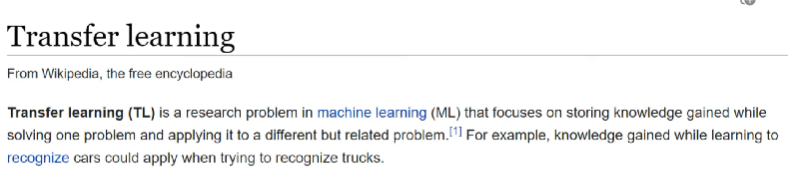# 

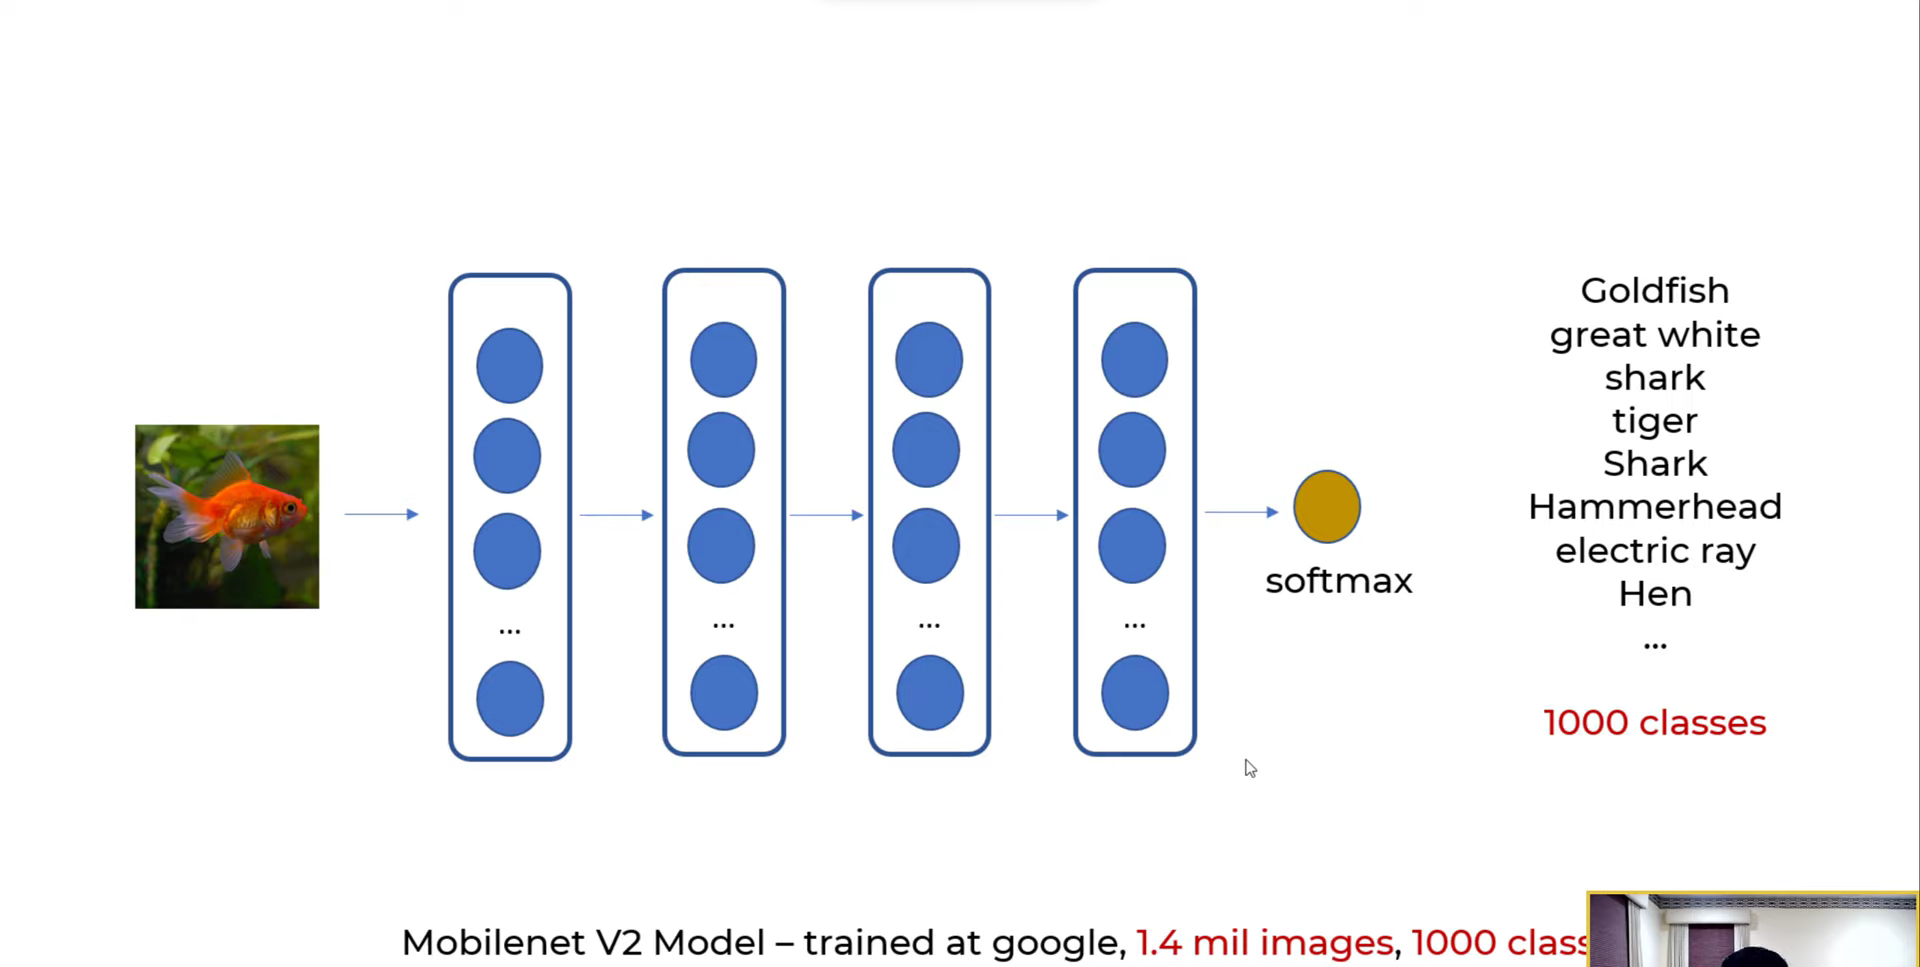

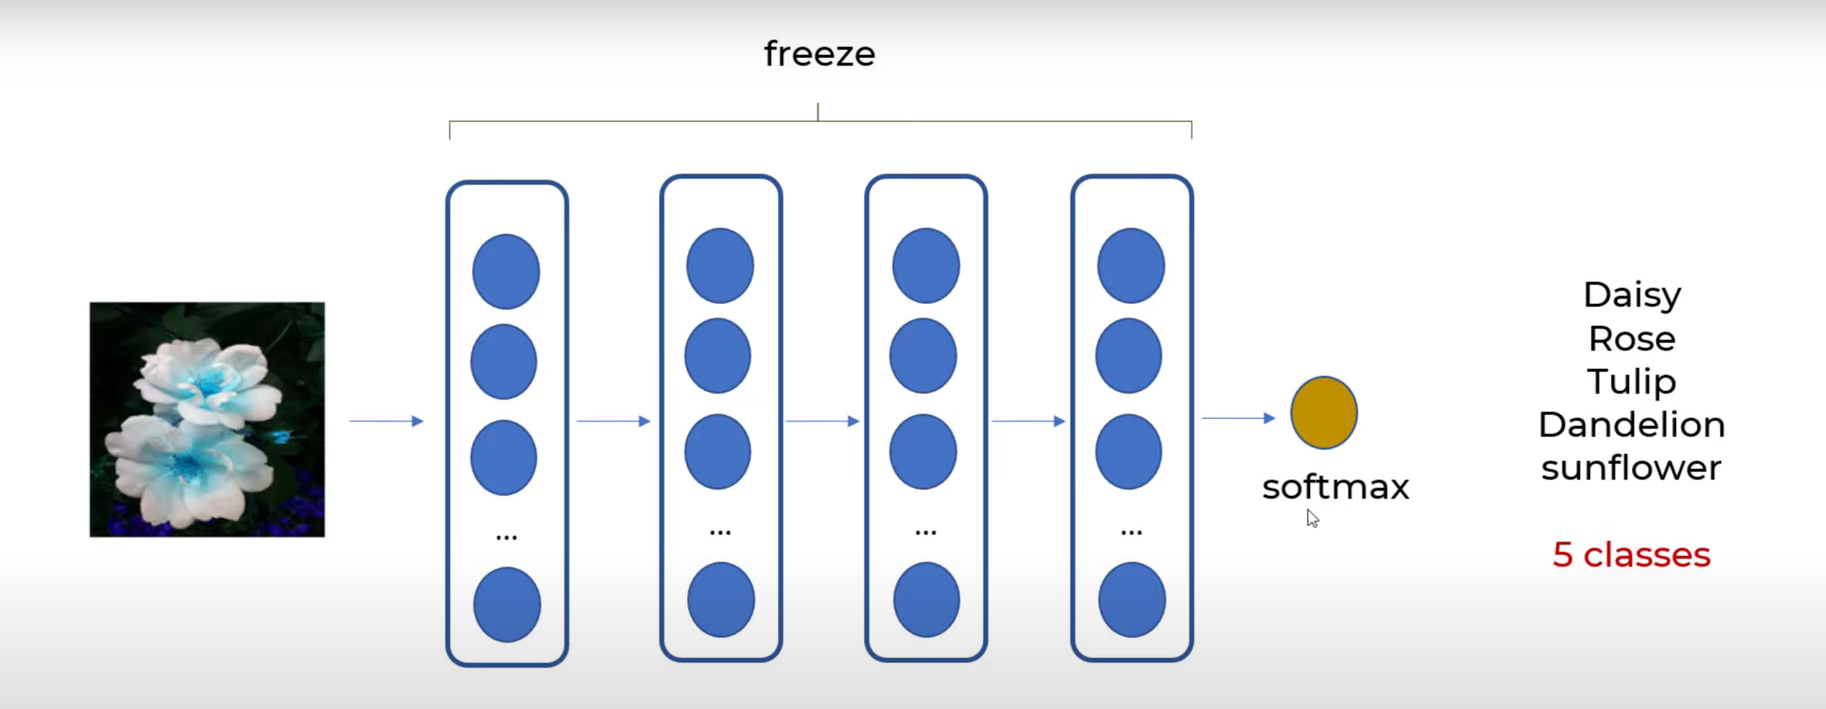

 During training weights of frozen layers dont get changes.We omit last layer of imported model.

In [77]:
pip install tensorflow_hub 

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 90.3/90.3 kB 1.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [78]:
import numpy as np
import cv2

import PIL.Image as Image
import os

import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

# Make predictions using ready made model (without any training)

In [79]:
IMAGE_SHAPE = (224, 224)

classifier = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", input_shape=IMAGE_SHAPE+(3,))
])

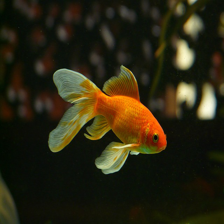

In [83]:
gold_fish = Image.open(r"C:\Users\Ayush\Downloads\goldfish.jpg").resize(IMAGE_SHAPE)
gold_fish

In [84]:
gold_fish = np.array(gold_fish)/255.0
gold_fish.shape

(224, 224, 3)

In [85]:
gold_fish[np.newaxis, ...]

array([[[[0.09803922, 0.10980392, 0.03921569],
         [0.10196078, 0.11372549, 0.03137255],
         [0.09019608, 0.10196078, 0.01960784],
         ...,
         [0.04313725, 0.06666667, 0.02745098],
         [0.03921569, 0.0627451 , 0.02352941],
         [0.03921569, 0.0627451 , 0.02352941]],

        [[0.09803922, 0.10588235, 0.05098039],
         [0.10196078, 0.11372549, 0.04705882],
         [0.09019608, 0.10196078, 0.03137255],
         ...,
         [0.03921569, 0.05882353, 0.02745098],
         [0.03529412, 0.05490196, 0.01960784],
         [0.03529412, 0.05882353, 0.01960784]],

        [[0.10980392, 0.11764706, 0.0627451 ],
         [0.10980392, 0.12156863, 0.05882353],
         [0.09803922, 0.10588235, 0.04313725],
         ...,
         [0.05098039, 0.0627451 , 0.03529412],
         [0.04705882, 0.05882353, 0.02352941],
         [0.04705882, 0.05882353, 0.02352941]],

        ...,

        [[0.17254902, 0.21176471, 0.07843137],
         [0.18823529, 0.22352941, 0.11372549]

In [86]:
result = classifier.predict(gold_fish[np.newaxis, ...])
result.shape

1/1 [==============================] - 1s 1s/step


(1, 1001)

In [87]:
predicted_label_index = np.argmax(result)
predicted_label_index

2

In [96]:
import tensorflow as tf

file_path = tf.keras.utils.get_file('ImageNetLabels.txt', 'https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt', cache_dir='./')
image_labels = []

with open(file_path, "r") as f:
    image_labels = f.read().splitlines()

print(image_labels[:5])


10484/10484 [==============================] - 0s 0us/step
['background', 'tench', 'goldfish', 'great white shark', 'tiger shark']


In [97]:
image_labels[predicted_label_index]

'goldfish'

# Load flowers dataset

In [98]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)
# cache_dir indicates where to download data. I specified . which means current directory
# untar true will unzip it

In [99]:
data_dir

'.\\datasets\\flower_photos'

In [100]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photos')

In [101]:
list(data_dir.glob('*/*.jpg'))[:5]

[WindowsPath('datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172636503_21bededa75_n.jpg')]

In [102]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [103]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

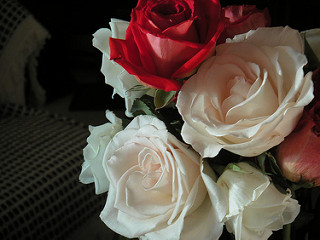

In [104]:
PIL.Image.open(str(roses[1]))

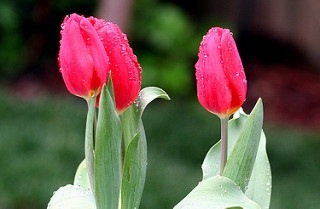

In [105]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

# Read flowers images from disk into numpy array using opencv

In [106]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [107]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [108]:
flowers_images_dict['roses'][:5]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

In [109]:
str(flowers_images_dict['roses'][0])

'datasets\\flower_photos\\roses\\10090824183_d02c613f10_m.jpg'

In [110]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))

In [111]:
img.shape

(240, 179, 3)

In [112]:
cv2.resize(img,(224,224)).shape

(224, 224, 3)

In [113]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(224,224))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [114]:
X = np.array(X)
y = np.array(y)

In [115]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [116]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

# Make prediction using pre-trained model on new flowers dataset

In [117]:
X[0].shape

(224, 224, 3)

In [118]:
IMAGE_SHAPE+(3,)

(224, 224, 3)

In [119]:
x0_resized = cv2.resize(X[0], IMAGE_SHAPE)
x1_resized = cv2.resize(X[1], IMAGE_SHAPE)
x2_resized = cv2.resize(X[2], IMAGE_SHAPE)

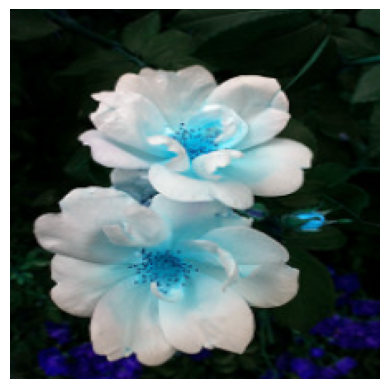

In [120]:
plt.axis('off')
plt.imshow(X[0])

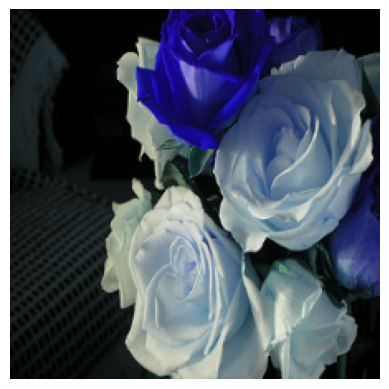

In [121]:
plt.axis('off')
plt.imshow(X[1])

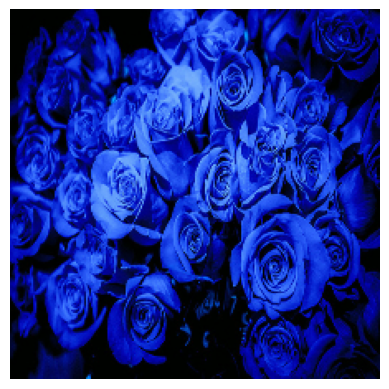

In [122]:
plt.axis('off')
plt.imshow(X[2])

In [123]:
predicted = classifier.predict(np.array([x0_resized, x1_resized, x2_resized]))
predicted = np.argmax(predicted, axis=1)
predicted

1/1 [==============================] - 0s 370ms/step


array([795, 880, 795], dtype=int64)

In [124]:
image_labels[795]

'shower curtain'

# Now take pre-trained model and retrain it using flowers images

In [125]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=(224, 224, 3), trainable=False)

In [126]:
num_of_flowers = 5

model = tf.keras.Sequential([
  pretrained_model_without_top_layer,
  tf.keras.layers.Dense(num_of_flowers)
])

model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense_10 (Dense)            (None, 5)                 6405      
                                                                 
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


In [127]:
model.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])

model.fit(X_train_scaled, y_train, epochs=5)

Epoch 1/5
86/86 [==============================] - 26s 252ms/step - loss: 0.8174 - acc: 0.6966
Epoch 2/5
86/86 [==============================] - 24s 283ms/step - loss: 0.4127 - acc: 0.8561
Epoch 3/5
86/86 [==============================] - 23s 266ms/step - loss: 0.3295 - acc: 0.8859
Epoch 4/5
86/86 [==============================] - 21s 243ms/step - loss: 0.2724 - acc: 0.9142
Epoch 5/5
86/86 [==============================] - 20s 238ms/step - loss: 0.2313 - acc: 0.9291


In [128]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 8s 258ms/step - loss: 0.3842 - acc: 0.8595


[0.38416656851768494, 0.8594771027565002]